## **LDA Muestra - Corte Constitucional**

## **Importación de librerías**

In [3]:
import nltk


# tokenizadores
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import TweetTokenizer

# diccionarios especiales para puntuación y palabras vacias
nltk.download('punkt') # Manejo de puntuación
nltk.download('stopwords')

# wordnet
nltk.download('wordnet')

from nltk.corpus import stopwords

# lematizador basado en WordNet de nltk
from nltk.stem import WordNetLemmatizer 

# steemer de nltk. Raiz de las palabras
#from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer 
import gensim
from gensim.parsing.preprocessing import STOPWORDS
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 


[nltk_data] Downloading package punkt to /home/caicardo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/caicardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/caicardo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# manipulación de datos
import pandas as pd
import numpy as np

# conveniencias
from tqdm import tqdm
import os

# proceso de texto
import json
import re
import nltk
import spacy
from string import punctuation

# procesamiento paralelo
from multiprocessing import Pool

# machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
from gensim.test.utils import datapath
from gensim.models import FastText

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [5]:
# from tqdm.notebook import tnrange, tqdm_notebook, tqdm
from tqdm import tqdm

In [6]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore

In [7]:
from gensim import corpora, models

In [8]:
nltk.download('stopwords')
nlp = spacy.load("es_core_news_md")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/caicardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import random

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
import matplotlib.pyplot as plt

## **Definición de funciones**

In [10]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
ABC = 'abcdefghijklmnñopqrstuvwxyzáéíóúü0123456789 '
regex_pattern = "[^{0}{1}_]".format(ABC, ABC.upper())

In [12]:
# abc = 'abcdefghijklmnñopqrstuvwxyzáéíóúü'
# char_remove = [c for c in caracteres if c not in ''.join([abc, abc.upper(), '0123456789', punctuation])]

In [13]:
def old_preprocessor(text):
    """
    preprocesador de texto
    """
    if not isinstance(text, str):
        return ""
    
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~ºª'''
    for char in punctuations:
        text = text.replace(char, " ")
    
    text = re.sub("\s+", " ", text)
    text = text.strip().lower()
    text = re.sub("\d+", "<NUM>", text)
    return text

In [14]:
def preprocessor(text):
    """
    preprocesador de texto
    """
    if not isinstance(text, str):
        return ""
    
    # punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~ºª~^`|'''
    # for char in punctuations:
    #     text = text.replace(char, " ")
    text = re.sub(regex_pattern, " ", text)
    text = re.sub("\s+", " ", text)
    text = text.strip().lower()
    text = re.sub("\d+", "<NUM>", text)
    return text

In [15]:
def preprocessor_sentences(text):
    """
    preprocesador de texto con separación de frases por línea.
    """
    if not isinstance(text, str):
        return ""
    # punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~ºª'''
    # for char in punctuations:
    #     text = text.replace(char, " ")
    text = re.sub(regex_pattern, " ", text)
    text = re.sub("\d+", "<NUM>", text)
    text = text.replace("\n\n", "<FIN>")
    text = text.replace(".", "<FIN>")
    text = re.sub("\s+", " ", text)
    text = text.replace("<FIN>", "\n")
    text = "".join([c for c in text if str.isprintable(c) or c=="\n" or c=="."])
    text = re.sub("[\n\r]+", "\n", text)
    text = text.lower()
    text = text.strip("\n ")
    return text

In [16]:
def wv_vectorizer(text):
    """
    Calcula el vector promedio de las palabras de la frase.
    """
    text = preprocessor(text)
    vec_list = []
    for word in [w for w in text.split() if w not in es_stopwords]:
        vec_list.append(model.wv[word])
    vec_list = np.array(vec_list)
    vec = np.mean(vec_list, axis=0)
    return vec

In [17]:
def remove_stopwords(text):
    tokens = text.split()
    out = " ".join([word for word in tokens if word not in es_stopwords])
    return out

In [18]:
def lemmatize(text):
    nlp_tokens = nlp(text)
    lemma = [w.lemma_ for w in nlp_tokens]
    lemma = " ".join(lemma)
    return lemma
    

In [19]:
def transform_token(token):
    if token.is_stop:
        return "<STOP>" + token.text
    if token.pos_!= 'PROPN':
        return token.lemma_
    return token.text


def full_preprocess(text, debug=False):
    """
    Performs lemmatization, stopword removal via spacy and custom list and preprocessing
    """
    text = re.sub("\s+", " ", text)
    nlp_tokens = nlp(text)
    mask = [w.pos_ for w in nlp_tokens]
    spacy_pp = [transform_token(w) for w in nlp_tokens]

    joint_spp = spacy_pp[0]
    for i in range(1, len(mask)):
        joint_spp = "".join([joint_spp, "_" if (mask[i]=='PROPN' and mask[i-1]=='PROPN') else " ", spacy_pp[i]])

    joint_spp = " ".join([w for w in joint_spp.split() if not w.startswith("<STOP>")])

    preprocessed = preprocessor(joint_spp)

    out = remove_stopwords(preprocessed)
    return out


## **Configuración**

In [20]:
RANDOM_STATE = 42
N_TOP_DOCS = 5
CARACTERES = 500

In [21]:
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

In [22]:
# DATA_PATH = './scrappy/'
DATA_PATH = "data/cc_dump_p.csv"

In [23]:
es_stopwords = nltk.corpus.stopwords.words("spanish")

In [24]:
es_stopwords.remove("no")

In [25]:
es_stopwords.append("<NUM>")

## **Lectura de datos**

In [26]:
df = pd.read_csv(DATA_PATH)

In [ ]:
df.rename({"class":"class_", "name":"sentencia"}, axis=1, inplace=True)

In [28]:
df.head()

,Unnamed: 0,p_index,tag,text,class_,sentencia,link
0,0,0,h5,Sentencia T-120/05,no_class,T-120-05,Relatoria/2005/T-120-05.htm
1,1,2,p,PROPIEDAD HORIZONTAL-Obligaciones a cargo de l...,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm
2,2,4,p,ADMINISTRACION DE PROPIEDAD HORIZONTAL-No pago...,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm
3,3,6,p,CUOTAS DE ADMINISTRACION-Compra de inmueble en...,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm
4,4,9,p,Referencia: expediente T-992178,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm


In [29]:
len(df)

6587045

In [30]:
df = df[[isinstance(x, str) for x in df.text.values]]

In [31]:
len(df)

6586593

## Revisión de caracteres problemáticos [opcional]

In [ ]:
caracteres = {c for text in df.text.values for c in text}

In [ ]:
abc = 'abcdefghijklmnñopqrstuvwxyzáéíóúü'
char_remove = [c for c in caracteres if c not in ''.join([abc, abc.upper(), '0123456789', punctuation])]

In [ ]:
def get_bad_char(text):
    return list(set([c for c in text if c not in ''.join([abc, abc.upper(), ' 0123456789', punctuation, '\r\n\t'])]))

In [ ]:
%%time
df["bad_char"] = [get_bad_char(x) for x in df.text.values]

In [ ]:
df["len_bad_char"] = [len(x) for x in df.bad_char.values]

In [ ]:
df[(df.len_bad_char>0)&(df.class_=='MsoNormal')]

## Stats

In [32]:
print("Cantidad de documentos: {}".format(len(df.sentencia.unique())))

Cantidad de documentos: 34932


In [33]:
df["word_count"] = [len(x.strip().split()) for x in df.text.values]

In [34]:
max_wc = np.max(df.word_count)
max_wc_p = df[df.word_count==max_wc].iloc[0].to_dict()
print("Características del párrafo más largo:")
print("- párrafo {0} de la sentencia {1}.".format(max_wc_p["p_index"], max_wc_p["sentencia"]))
print("- Contiene {} palabras.".format(max_wc_p["word_count"]))

Características del párrafo más largo:
- párrafo 22 de la sentencia T-1532-00.
- Contiene 7456 palabras.


In [35]:
df["class_"] = pd.Categorical(df["class_"])

In [36]:
df["class_"].value_counts()

MsoNormal           4550691
MsoFootnoteText      761740
MsoBodyText          235933
no_class             139539
MsoListParagraph      84887
                     ...   
ecxecxbodytext2           1
ecmsobodytext             1
decretos                  1
de                        1
yiv8754979524             1
Name: class_, Length: 1357, dtype: int64

## **Preprocesamiento de texto (para TF-IDF)**

Como el preprocesamiento no toma tanto tiempo, no hay problema en repetirlo, pero en general no es necesario volver a preprocesar los datos, se pueden guardar descomentando el código más abajo.

In [37]:
%%time
with Pool(8) as my_pool:
    pp_list = my_pool.map(full_preprocess, df.text.values)

CPU times: user 9.75 s, sys: 9.43 s, total: 19.2 s
Wall time: 2h 3min 25s


In [38]:
df["pp"] = pp_list

In [39]:
df.head()

,Unnamed: 0,p_index,tag,text,class_,sentencia,link,word_count,pp
0,0,0,h5,Sentencia T-120/05,no_class,T-120-05,Relatoria/2005/T-120-05.htm,2,sentencia_t
1,1,2,p,PROPIEDAD HORIZONTAL-Obligaciones a cargo de l...,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm,27,propiedad_horizontal obligaciones cargo propie...
2,2,4,p,ADMINISTRACION DE PROPIEDAD HORIZONTAL-No pago...,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm,10,administracion propiedad_horizontal no pago cu...
3,3,6,p,CUOTAS DE ADMINISTRACION-Compra de inmueble en...,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm,14,cuotas administracion compra inmueble remate d...
4,4,9,p,Referencia: expediente T-992178,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm,3,referencia expediente t


**Guardar datos preprocesados**

In [40]:
df.to_csv("data/cc_dump_full_pp_20210508.csv")

## Para datos ya preprocesados, empezar acá

In [27]:
df = pd.read_csv("data/cc_dump_full_pp_20210508.csv")

In [28]:
len(df)

6586593

In [29]:
df.head()

,Unnamed: 0,Unnamed: 0.1,p_index,tag,text,class_,sentencia,link,word_count,pp
0,0,0,0,h5,Sentencia T-120/05,no_class,T-120-05,Relatoria/2005/T-120-05.htm,2,sentencia_t
1,1,1,2,p,PROPIEDAD HORIZONTAL-Obligaciones a cargo de l...,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm,27,propiedad_horizontal obligaciones cargo propie...
2,2,2,4,p,ADMINISTRACION DE PROPIEDAD HORIZONTAL-No pago...,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm,10,administracion propiedad_horizontal no pago cu...
3,3,3,6,p,CUOTAS DE ADMINISTRACION-Compra de inmueble en...,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm,14,cuotas administracion compra inmueble remate d...
4,4,4,9,p,Referencia: expediente T-992178,MsoNormal,T-120-05,Relatoria/2005/T-120-05.htm,3,referencia expediente t


#### Ejemplo preproceso

In [30]:
# Ejemplo
id_ejemplo = 687
print("Original:\n{}".format(df.iloc[id_ejemplo].text))
print("-*"*20)
print("Preprocesado:\n{}".format(df.iloc[id_ejemplo].pp))
print("-*"*20)
print("Quitar palabras vacías (stop words):\n{}".format(remove_stopwords(df.iloc[id_ejemplo].pp)))
print("-*"*20)
print("Lematización:\n{}".format(lemmatize(remove_stopwords(df.iloc[id_ejemplo].pp))))
print("-*"*20)
print("Full Preprocess:\n{}".format(full_preprocess(df.iloc[id_ejemplo].text)))
print("-*"*20)
print("Full Preprocess debug:\n{}".format(full_preprocess(df.iloc[id_ejemplo].text, debug=True)))

Original:
16- La Corte destaca
que el anterior análisis es compatible con los criterios desarrollados en la
sentencia C-215 de 1999, MP Martha Victoria Sáchica de Moncaleano, citada por
el actor y por varios de los intervinientes para sustentar la
inconstitucionalidad del término de prescripción consagrado por la norma
acusada.  Así, esa providencia declaró la inconstitucionalidad del término de
caducidad establecido por el artículo 11 de la Ley 472 de 1998, según el cual,
la acción popular caducaba en 5 años cuando estaba dirigida a volver las cosas
a su estado anterior. El argumento central de la Corte fue que no se justifica un
término de caducidad, “mientras subsista la vulneración a un derecho o interés
colectivo y exista la posibilidad de volver las cosas al estado anterior para
hacer cesar esa violación”, pues en tal evento debe entenderse que “cualquiera
de los miembros del grupo social debe tener la oportunidad de acudir a la
justicia, para obtener esa protección”. Nótese pues

### Verificaciones de textos vacíos

In [31]:
df[df.text.isnull()]

,Unnamed: 0,Unnamed: 0.1,p_index,tag,text,class_,sentencia,link,word_count,pp


In [32]:
df[df.pp==""]

,Unnamed: 0,Unnamed: 0.1,p_index,tag,text,class_,sentencia,link,word_count,pp


In [33]:
# df = df[df.pp!=""].copy()
df = df[df.text.notnull()].copy()

In [34]:
len(df)

6586593

In [35]:
df[~np.array([isinstance(x, str) for x in df.pp.values])]

,Unnamed: 0,Unnamed: 0.1,p_index,tag,text,class_,sentencia,link,word_count,pp
205,205,205,123,p,(…),MsoNormal,T-515-06,Relatoria/2006/T-515-06.htm,1,NaN
597,597,597,95,p,(...),MsoNormal,C-381-00,Relatoria/2000/C-381-00.htm,1,NaN
601,601,601,103,p,(…),MsoNormal,C-381-00,Relatoria/2000/C-381-00.htm,1,NaN
671,671,671,246,p,(…),MsoNormal,C-381-00,Relatoria/2000/C-381-00.htm,1,NaN
1078,1078,1078,642,p,(…),MsoNormal,T-241-16,Relatoria/2016/T-241-16.htm,1,NaN
...,...,...,...,...,...,...,...,...,...,...
6585671,6586123,6586123,602,p,716,MsoNormal,C-307-20,Relatoria/2020/C-307-20.htm,1,NaN
6585672,6586124,6586124,603,p,608,MsoNormal,C-307-20,Relatoria/2020/C-307-20.htm,1,NaN
6585673,6586125,6586125,604,p,113,MsoNormal,C-307-20,Relatoria/2020/C-307-20.htm,1,NaN
6585674,6586126,6586126,605,p,2676,MsoNormal,C-307-20,Relatoria/2020/C-307-20.htm,1,NaN


In [36]:
df = df[[isinstance(x, str) for x in df.pp.values]].copy()

## LDA

In [37]:
# sample for testing purposes
doc_list = df.sentencia.unique().tolist()
doc_sample = random.sample(doc_list, k=int(len(doc_list)/10))

In [38]:
df_sample = df[df.sentencia.isin(doc_sample)].copy()

In [39]:
df_sample.head()

,Unnamed: 0,Unnamed: 0.1,p_index,tag,text,class_,sentencia,link,word_count,pp
3990,3990,3990,0,p,Sentencia\r\nC-251/20,MsoNormal,C-251-20,Relatoria/2020/C-251-20.htm,2,sentencia_c
3991,3991,3991,2,p,DECRETO\r\nLEGISLATIVO EN DESARROLLO DE ESTADO...,MsoNormal,C-251-20,Relatoria/2020/C-251-20.htm,16,decreto_legislativo desarrollo emergencia auto...
3992,3992,3992,4,p,"ESTADO\r\nDE EMERGENCIA ECONOMICA, SOCIAL Y EC...",MsoNormal,C-251-20,Relatoria/2020/C-251-20.htm,15,emergencia economico social ecologico derivado...
3993,3993,3993,6,p,CONTROL\r\nCONSTITUCIONAL DE DECRETO LEGISLATI...,MsoNormal,C-251-20,Relatoria/2020/C-251-20.htm,13,control constitucional decreto_legislativo eme...
3994,3994,3994,8,p,DECRETO\r\nLEGISLATIVO DE ESTADO DE EMERGENCIA...,MsoNormal,C-251-20,Relatoria/2020/C-251-20.htm,14,decreto_legislativo emergencia economico socia...


In [40]:
# DESCARGAR MEMORIA!
df = None

In [41]:
# %%time
# print("stopwords")
# with Pool(8) as my_pool:
#     lemma_list = my_pool.map(remove_stopwords, df_sample.pp.values)

In [42]:
# %%time
# print("lemma")
# with Pool(8) as my_pool:
#     lemma_list = my_pool.map(lemmatize, lemma_list)

In [43]:
# df_sample["lemma_stop"] = lemma_list

In [44]:
df_sample["lemma_stop"] = df_sample["pp"]

In [45]:
# df.to_csv("data/df_lemma.csv")

In [46]:
# df = pd.read_csv("data/df_lemma.csv")

In [47]:
df_sample[[isinstance(a, float) for a in df_sample.lemma_stop.values]]

,Unnamed: 0,Unnamed: 0.1,p_index,tag,text,class_,sentencia,link,word_count,pp,lemma_stop


In [48]:
df_sample = df_sample[[isinstance(a, str) for a in df_sample.lemma_stop.values]]

In [49]:
df_sample[df_sample.lemma_stop.str.contains("\n")]

,Unnamed: 0,Unnamed: 0.1,p_index,tag,text,class_,sentencia,link,word_count,pp,lemma_stop


In [50]:
corpus_path = "cc_lemma_corpus_sample.txt"

In [51]:
df_sample.lemma_stop.to_csv(corpus_path, index=False, header=False)

In [52]:
class MyCorpus:
    def __init__(self, file_path: str, dictionary):
        self.dictionary = dictionary
        self.file_path = file_path
    def __iter__(self):
        for line in open(self.file_path):
            # assume there's one document per line, tokens separated by whitespace
            yield self.dictionary.doc2bow(line.lower().strip().split())


In [53]:
%%time
cc_dict = corpora.Dictionary(line.lower().strip().split() for line in open(corpus_path))

CPU times: user 14.1 s, sys: 134 ms, total: 14.3 s
Wall time: 14.4 s


In [54]:
len(cc_dict)

122523

In [55]:
cc_dict.filter_extremes(no_above=0.5, keep_n=200000)
cc_dict.compactify()  # remove gaps in id sequence after words that were removed

In [56]:
len(cc_dict)

34320

## Extraer palabras más frecuentes por documento (no párrafo)

In [57]:
%%time
doc_dict = {doc:' '.join(df_sample[df_sample.sentencia==doc]["lemma_stop"].values) for doc in df_sample.sentencia.unique()}

CPU times: user 1min 28s, sys: 368 ms, total: 1min 28s
Wall time: 1min 29s


In [58]:
doc_word_dict = {d:list(set(doc_dict[d].strip().split())) for d in doc_dict}

In [59]:
for item in cc_dict.iteritems():
    print(item)
    break

(0, 'sentencia_c')


In [60]:
for d in doc_word_dict:
    print(d, doc_word_dict[d])
    break

C-251-20 ['contexto', 'aprovechamiento', 'sic', 'notifíquese', 'posterior', 'ejercido', 'social', 'colapsibl', 'opc', 'conmocionar', 'gestionar', 'respectivo', 'condicionamiento', 'trabajador', 'sentencia_c', 'correr', 'resaltar', 'economía', 'condicionalidad', 'diario_oficial', 'interpretar', 'ende', 'incorporación', 'servicios_públicos', 'oportunidad', 'fuerza', 'optar', 'rendimiento', 'elemento', 'actualización', 'responder', 'iniciativa', 'agravación', 'vigencia', 'contrarir', 'destinado', 'creado', 'territorial', 'renovar', 'modalidad', 'excepcional', 'arca', 'obtener', 'proporcionado', 'b', 'nodeid', 'plasmar', 'dificultad', 'limitado', 'usuario', 'juzgar', 'celebración', 'voluntario', 'personalidad', 'criterio', 'preventivo', 'innecesario', 'ibídem', 'fungir', 'monarca', 'innegable', 'consecuente', 'examine', 'resuelve', 'modifiquen', 'agricultura', 'gubernamental', 'episodio', 'derecho', 'función', 'personería', 'autorización', 'lógica', 'conferida', 'precepto', 'proceso', 'rev

In [61]:
doc_df = pd.DataFrame([{"name":doc, "words":' '.join(doc_word_dict[doc])} for doc in doc_word_dict])

In [62]:
doc_df

,name,words
0,C-251-20,contexto aprovechamiento sic notifíquese poste...
1,A260-17,juzgado_tercero_promiscuo notifíquese stop deu...
2,A433-15,hecho mayor mencionado presidenta realizar con...
3,SU061-18,contexto notifíquese construir presuntamente a...
4,T-573-10,selectivo contexto sic notifíquese social cons...
...,...,...
3488,T-494-95,fabio_morón_díaz contexto deír diseñado sic no...
3489,T-233-04,resumir recordar notifíquese stop privar deuda...
3490,T-091-11,diagnosticado dolencia contexto vender negació...
3491,C-375-02,parámetro notaría_ satisfacer municipal antece...


In [63]:
cv = CountVectorizer(max_df=0.5)

In [64]:
cv.fit(doc_df.words)

CountVectorizer(max_df=0.5)

In [65]:
cv.stop_words_

{'abril',
 'acceso',
 'accionante',
 'acción',
 'actividad',
 'acto',
 'actor',
 'actuación',
 'acudir',
 'administración',
 'administrar',
 'administrativo',
 'adoptado',
 'adoptar',
 'advertir',
 'afectado',
 'afectar',
 'afirmar',
 'agosto',
 'alcance',
 'amparo',
 'analizar',
 'antecedente',
 'anterior',
 'análisis',
 'aplicación',
 'aplicar',
 'argumento',
 'art',
 'artículo',
 'asegurar',
 'aspecto',
 'asumir',
 'asunto',
 'atención',
 'atender',
 'auto',
 'autoridad',
 'año',
 'base',
 'bogotá',
 'calidad',
 'carecer',
 'cargo',
 'carta',
 'carácter',
 'caso',
 'causa',
 'circuito',
 'circunstancia',
 'citado',
 'ciudadano',
 'competencia',
 'competente',
 'comunicación',
 'comuníquese',
 'conceder',
 'concepto',
 'concluir',
 'concreto',
 'condición',
 'confirmar',
 'conforme',
 'conformidad',
 'conocimiento',
 'consagrado',
 'consecuencia',
 'consideración',
 'considerar',
 'constitucional',
 'constitución',
 'constitución_política',
 'constituir',
 'contar',
 'contenido',
 'c

In [66]:
len(cv.stop_words_)

345

## Remove stopwords

In [67]:
stop_ids = [cc_dict.token2id[w] for w in cv.stop_words_]

In [68]:
cc_dict.filter_tokens(bad_ids=stop_ids)
cc_dict.compactify()

## Quitar palabras cortas

In [70]:
word_set = list(set([w for doc in doc_word_dict for w in doc_word_dict[doc]]))

In [73]:
word_len = [(w, len(w)) for w in word_set]

In [74]:
short_words = [word for word, length in word_len if length<3]

In [75]:
len(short_words)

442

In [77]:
short_words = [w for w in short_words if w in cc_dict.token2id.keys()]
short_ids = [cc_dict.token2id[w] for w in short_words]

In [78]:
cc_dict.filter_tokens(bad_ids=short_ids)
cc_dict.compactify()

## Train LDA

In [79]:
light_corpus = MyCorpus(corpus_path, cc_dict)

In [80]:
%%time
tfidf = models.TfidfModel(light_corpus)

CPU times: user 7.83 s, sys: 36.4 ms, total: 7.87 s
Wall time: 7.88 s


In [81]:
class TfidfCorpus:
    def __init__(self, corpus, model):
        self.corpus = corpus
        self.model = model
    def __iter__(self):
        for line in self.corpus:
            # assume there's one document per line, tokens separated by whitespace
            yield self.model[line]


In [82]:
corpus_tfidf = TfidfCorpus(light_corpus, tfidf)

In [83]:
%%time
# Train the model on the corpus.
lda = LdaMulticore(corpus_tfidf,
                   id2word=cc_dict,
                   num_topics=8,
                   workers=4,
                   per_word_topics=True,
                   random_state=RANDOM_STATE,
                   passes=1)

CPU times: user 1min 47s, sys: 1.14 s, total: 1min 48s
Wall time: 1min 48s


In [84]:
x=lda.show_topics(num_topics=8, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words 
# for topic,words in topics_words:
#     print(" ".join(words))


0::['acusado', 'nacional', '_sentencia', 'internacional', 'libertad', 'constitucionalidad', 'supra', 'régimen', 'sector', 'legislador']
1::['pensión', 'laboral', '_cuaderno', 'trabajador', 'contrato', 'pensional', 'salario', 'invalidez', 'reconocimiento', 'pruebas']
2::['salud', 'médico', 'menor', 'tratamiento', 'familia', 'niño', 'medicamento', 'edad', 'asistencia', 'paciente']
3::['folio', 'cuaderno', 'cfr', 'principal', 'folios', 'nulidad', 'manuel_josé_cepeda_espinosa', 'luis_ernesto_vargas_silva', '_josé_gregorio_hernández_galindo', 'selección']
4::['ministerio', 'tribunal_superior', 'copia', 'nación', 'expediente_t', 'sentencias_t', 'municipio', 'juzgado_', 'distrito_judicial', 'bogotá_d']
5::['_sentencia_t', 'magistrada', 'presidente', 'accion', 'sala_plena', 'moncaleano', 'república', 'congreso', 'proyecto', 'decision']
6::['_sentencia_c', 'voto', 'penal', 'impugnación', 'insértese', 'legislador', 'salvamento', 'cópiese', 'interpretación', 'conducta']
7::['_corte_constitucional

In [85]:
%%time
# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity([x for x in light_corpus]))  # a measure of how good the model is. lower the better.


Perplexity:  -8.631606194447553
CPU times: user 2min 17s, sys: 378 ms, total: 2min 17s
Wall time: 2min 17s


In [86]:
%%time
corpus_list = [x for x in light_corpus]
for i in range(2, 33):
    lda = LdaMulticore(corpus_tfidf,
                       id2word=cc_dict,
                       num_topics=i,
                       workers=4,
                       per_word_topics=True,
                       random_state=RANDOM_STATE,
                       passes=1)
    print('Topics: {0: 2d}\tPerplexity: {1:.4f}'.format(i, lda.log_perplexity(corpus_list)))

Topics:  2	Perplexity: -8.4585
Topics:  3	Perplexity: -8.4573
Topics:  4	Perplexity: -8.4319
Topics:  5	Perplexity: -8.4519
Topics:  6	Perplexity: -8.5279
Topics:  7	Perplexity: -8.5730
Topics:  8	Perplexity: -8.6514
Topics:  9	Perplexity: -8.7572
Topics:  10	Perplexity: -8.9378
Topics:  11	Perplexity: -9.2249
Topics:  12	Perplexity: -9.3055
Topics:  13	Perplexity: -9.3558
Topics:  14	Perplexity: -9.1235
Topics:  15	Perplexity: -9.8188
Topics:  16	Perplexity: -9.5724
Topics:  17	Perplexity: -10.0218
Topics:  18	Perplexity: -9.9078
Topics:  19	Perplexity: -9.9997
Topics:  20	Perplexity: -10.3416
Topics:  21	Perplexity: -10.4347
Topics:  22	Perplexity: -10.5308
Topics:  23	Perplexity: -10.6941
Topics:  24	Perplexity: -10.7874
Topics:  25	Perplexity: -10.9594
Topics:  26	Perplexity: -10.5338
Topics:  27	Perplexity: -11.2289
Topics:  28	Perplexity: -11.3943
Topics:  29	Perplexity: -11.5475
Topics:  30	Perplexity: -10.7155
Topics:  31	Perplexity: -11.8278
Topics:  32	Perplexity: -11.3065


In [12]:
perplex_list = [-8.4585, -8.4573, -8.4319, -8.4519, -8.5279, -8.5730, -8.6514, -8.7572, -8.9378, -9.2249, -9.3055, -9.3558, -9.1235, -9.8188, -9.5724, -10.0218, -9.9078, -9.9997, -10.3416, -10.4347, -10.5308, -10.6941, -10.7874, -10.9594, -10.5338, -11.2289, -11.3943, -11.5475, -10.7155, -11.8278, -11.3065]

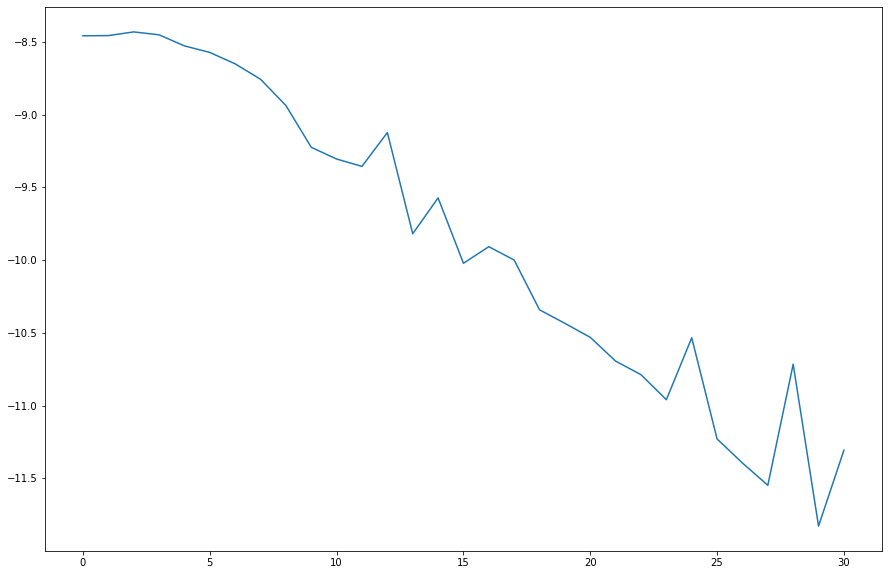

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(perplex_list)
plt.show()

In [72]:
%%time
# Train the model on the corpus.
lda2 = LdaMulticore(corpus_tfidf,
                   id2word=cc_dict,
                   num_topics=16,
                   workers=4,
                   per_word_topics=True,
                   random_state=RANDOM_STATE,
                   passes=1)

CPU times: user 1min 52s, sys: 1.24 s, total: 1min 53s
Wall time: 1min 53s


In [73]:
x=lda2.show_topics(num_topics=16, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words 
# for topic,words in topics_words:
#     print(" ".join(words))


0::['pensión', 'presidente', 'invalidez', 'república', 'seccion', 'congreso', 'pensional', 'reiteración', 'proyecto', 'semana']
1::['_sentencia_t', 'gabriel_eduardo_mendoza_martelo', 'sierra', '<num>a', '<num>o', 'porto', 'exequible', 'rojas', 'humberto_antonio', 'r']
2::['m', 'p', 'c', 'cfr', 'sala_plena', 'expediente_t', 'pruebas', 't', '_p', '_sentencia_t']
3::['folio', 'cuaderno', 'folios', 'principal', '_cuaderno', 'copia', 'ministerio', 'fotocopia', 'fls', 'nación']
4::['salud', 'médico', 'tratamiento', 'examen', 's', 'jorge_ignacio_pretelt_chaljub', 'eps', 'paciente', 'constitucionalidad', 'tratante']
5::['i', 'carrera', 'manuel_josé_cepeda_espinosa', 'concurso', 'fl', 'antonio_barrera_carbonell', 'supra', 'ut', 'súplica', 'precedente']
6::['t', 'mp', '_corte_constitucional', 'moncaleano', 'sentencias_t', 'jaime_córdoba_triviño', 'c', 'sala_cuarta', '_', 'sachico']
7::['inconstitucionalidad', 'atribución', 'luis_guillermo_guerrero_pérez', 'jorge_iván_palacio_palacio', 'cosa', 's

In [74]:
%%time
# Compute Perplexity
print('\nPerplexity: ', lda2.log_perplexity([x for x in light_corpus]))  # a measure of how good the model is. lower the better.


Perplexity:  -9.785772425888313
CPU times: user 2min 24s, sys: 189 ms, total: 2min 24s
Wall time: 2min 25s


In [ ]:
from gensim 

In [76]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=[x for x in light_corpus], dictionary=cc_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

NameError: name 'CoherenceModel' is not defined

In [120]:
# frase = "Deberes y atribuciones del juez para obtener la prueba genética ADN"
frase = "Acceso a la salud del adulto mayor"

In [28]:
bow_busqueda = cc_dict.doc2bow(frase.split())

print(lda.get_document_topics(bow_busqueda))

[(0, 0.03125019), (1, 0.03125019), (2, 0.03125019), (3, 0.03125019), (4, 0.03125019), (5, 0.6981773), (6, 0.11432161), (7, 0.03125019)]


In [ ]:
topn_words = {'Topic_' + str(i): [word for word, prob in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}

In [ ]:
topn_words

In [ ]:
for i in range(8):
    print(i, lda.show_topic(i))

In [ ]:
lda.print_topics(num_topics=8, num_words=10)

In [56]:
df[df.pp.str.contains("problema jurídico")|df.pp.str.contains("pregunta jurídica")]

,INDEX,DOCUMENT_TYPE,LINK,DOCUMENT,DOCUMENT_WITH_SIGNS,DOCUMENT_CLEAN,tipo,pp
52,A475-20,A,https://www.corteconstitucional.gov.co/Relator...,auto 47520\n \n \nreferencia: expediente d-113...,auto 47520 referencia: expediente d-11306 dem...,auto 47520 referencia expediente d 11306 deman...,A,auto <NUM> referencia expediente d <NUM> deman...
58,A469-20,A,https://www.corteconstitucional.gov.co/Relator...,auto 46920\n \n \nexpediente: d-13967\n \nasun...,auto 46920 expediente: d-13967 asunto: recurs...,auto 46920 expediente d 13967 asunto recurso d...,A,auto <NUM> expediente d <NUM> asunto recurso d...
84,A440-20,A,https://www.corteconstitucional.gov.co/Relator...,auto\r\n44020\n \n \nreferencia: expediente\r\...,auto 44020 referencia: expediente t-7785975 a...,auto 44020 referencia expediente t 7785975 acc...,A,auto <NUM> referencia expediente t <NUM> acció...
114,A406-20,A,https://www.corteconstitucional.gov.co/Relator...,auto\r\n40620\n \n \nexpediente: d-12329\n \nr...,auto 40620 expediente: d-12329 referencia: so...,auto 40620 expediente d 12329 referencia solic...,A,auto <NUM> expediente d <NUM> referencia solic...
118,A402-20,A,https://www.corteconstitucional.gov.co/Relator...,auto 40220\n \n \nexpediente d-13808\n \nsolic...,auto 40220 expediente d-13808 solicitud de me...,auto 40220 expediente d 13808 solicitud de med...,A,auto <NUM> expediente d <NUM> solicitud de med...
...,...,...,...,...,...,...,...,...
34106,C-345-93,C,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia\r\nno. c-3...,sentencia no sentencia no. c-34593 cosa juzga...,sentencia no sentencia no c 34593 cosa juzgada...,C,sentencia no sentencia no c <NUM> cosa juzgada...
34242,C-005-93,C,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia\r\nc-00593...,sentencia no sentencia c-00593 juegos electron...,sentencia no sentencia c 00593 juegos electron...,C,sentencia no sentencia c <NUM> juegos electron...
34268,T-581-92,T,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no.\r\nt-5...,sentencia no sentencia no. t-58192 derecho al ...,sentencia no sentencia no t 58192 derecho al t...,T,sentencia no sentencia no t <NUM> derecho al t...
34270,T-577-92,T,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no.\r\nt-5...,sentencia no sentencia no. t-57792 banco de da...,sentencia no sentencia no t 57792 banco de dat...,T,sentencia no sentencia no t <NUM> banco de dat...


In [58]:
df.iloc[0].DOCUMENT.split("\n\n")

['auto 10721\n\xa0\n\xa0\nreferencia: expediente t-7.909.170 ac.\n\xa0\nacción\r\nde tutela promovida por carmen alicia rodríguez berrío y otros contra holding\r\ninmobiliaria y otros.\n\xa0\nasunto:\r\nsolicitud de\r\ncumplimiento de la sentencia t-020 de 2021.\n\xa0\npeticionaria:\r\ncarmen alicia rodríguez berrío.\n\xa0\nmagistrada\r\nsustanciadora:\ngloria\r\nstella ortiz delgado.\n\xa0\n\xa0\nbogotá,\r\nd.c., nueve (9) de marzo de dos mil veintiuno (2021).\n\xa0\n\xa0\nla\r\nsuscrita magistrada sustanciadora, en ejercicio de sus competencias\r\nconstitucionales y legales, profiere el presente auto con fundamento en los\r\nsiguientes:\nantecedentes\n\xa0\n1. el pasado 27 de enero, la sala\r\nsexta de revisión profirió la sentencia t-020 de 2021[1]. en el caso\r\nparticular de la señora carmen alicia, dicha providencia concedió el amparo de los derechos a la estabilidad laboral reforzada y al mínimo\r\nvital. \n\xa0\n2. en consecuencia, esta corporación le ordenó a holding\r\ninmobi

## **Entrenamiento de vectores de palabras**

No es necesario entrenar el modelo con el corpus cada vez que se ejecute el libro, pasar a "cargar modelo"

**Prueba Segmentación por frases**

In [25]:
for i, frase in enumerate([frase for frase in preprocessor_sentences(df.iloc[0].DOCUMENT).split("\n")]):
    print("{0}. {1}".format(i, frase))

0. auto <num> referencia expediente t <num>
1. <num>
2. <num> ac
3.  acción de tutela promovida por carmen alicia rodríguez berrío y otros contra holding inmobiliaria y otros
4.  asunto solicitud de cumplimiento de la sentencia t <num> de <num>
5.  peticionaria carmen alicia rodríguez berrío
6.  magistrada sustanciadora gloria stella ortiz delgado
7.  bogotá d
8. c
9.  nueve <num> de marzo de dos mil veintiuno <num> 
10.  la suscrita magistrada sustanciadora en ejercicio de sus competencias constitucionales y legales profiere el presente auto con fundamento en los siguientes antecedentes <num>
11.  el pasado <num> de enero la sala sexta de revisión profirió la sentencia t <num> de <num> <num> 
12.  en el caso particular de la señora carmen alicia dicha providencia concedió el amparo de los derechos a la estabilidad laboral reforzada y al mínimo vital
13.  <num>
14.  en consecuencia esta corporación le ordenó a holding inmobiliaria reintegrar a la peticionaria al trabajo que desempeñaba

**Guardar Corpus de documentos segmentados por frase**

In [24]:
with open("data/corpus/corpus_cc_v1.2.txt", "w") as file:
    for doc in df.DOCUMENT.values:
        file.write(preprocessor_sentences(doc))
        file.write("\n")

In [ ]:
carpeta = os.getcwd()
direccion_corpus = os.path.join(carpeta, 'corpus_cc.txt')

In [ ]:
corpus_file = datapath(direccion_corpus)         # absolute path to corpus
model = FastText(size=100, 
                 window=5, 
                 min_count=5, 
                 workers=-1, 
                 seed=RANDOM_STATE)
model.build_vocab(corpus_file=corpus_file)      # scan over corpus to build the vocabulary
total_words = model.corpus_total_words          # number of words in the corpus
model.train(corpus_file=corpus_file, total_words=total_words, epochs=5)

**Guardar modelo** 

In [78]:
model.save("modelo_cc.vec")

**Cargar modelo**

In [32]:
model = FastText.load("modelo_cc.vec")

## **Calcular vectores de las frases y los documentos**

**Entrenar vectores de documentos**

In [60]:
df = df[df.DOCUMENT==df.DOCUMENT].copy()

In [66]:
df["is_vec"] = [isinstance(x, np.ndarray) for x in df.vec.values]

In [68]:
df = df[df.is_vec].copy()

In [69]:
%%time
with Pool(8) as libreypool:
    vectors = libreypool.map(wv_vectorizer, df.pp.values)

df["vec"] = vectors

CPU times: user 659 ms, sys: 1.65 s, total: 2.31 s
Wall time: 3min 3s


In [70]:
doc_vectors = np.array([x for x in df.vec.values])
# doc_vectors = df.vec.values

**Guardar documentos con vectores**

In [16]:
df.to_csv("documents_vectors.csv")

**Cálculo de vector de la frase**

In [85]:
frase = "falsos positivos"

In [86]:
# calcular el vector de la frase
phrase_vec = wv_vectorizer(frase)

In [87]:
phrase_vec

array([-7.9891179e-04, -8.3545595e-04,  7.9064514e-05, -1.3889532e-04,
        7.7432662e-05, -9.4342715e-04,  8.5287174e-04, -1.5671623e-03,
       -3.0127165e-04,  5.8555260e-04,  1.4666485e-04, -5.9159973e-04,
        5.9816433e-04, -2.6181113e-04,  5.0692237e-04,  1.0184325e-04,
        1.4262067e-03,  1.0098720e-03,  1.1577185e-03, -1.2289413e-04,
        6.6517445e-04, -1.1912251e-03,  9.5556816e-04, -3.6705533e-04,
        1.1676630e-03, -4.8767758e-04,  1.1756071e-03,  6.2923471e-04,
        1.2166422e-03, -5.3517980e-04,  1.2296244e-03, -2.8679153e-04,
        1.8864045e-03, -3.0844501e-04,  2.9044930e-04,  1.0440049e-03,
        4.0050963e-04, -2.2457402e-04,  1.5262102e-03, -1.7055466e-03,
       -6.2408613e-04, -2.0565407e-03, -5.7985861e-04,  1.4982749e-03,
       -2.7552780e-04, -4.6384637e-04,  4.6858302e-04,  5.4883078e-04,
       -2.3545537e-04,  9.4649848e-04,  1.6477994e-04,  1.7281016e-04,
        1.3864455e-03,  4.8082497e-05, -2.1727444e-03,  5.0347362e-04,
      

In [88]:
# Calcular distancia de la frase a los documentos
distances = cosine_distances(phrase_vec.reshape(1, -1), doc_vectors)
# distances = cosine_distances(phrase_vec, doc_vectors)

In [89]:
distances = distances.flatten()

In [90]:
top_docs = np.argsort(distances, )[:N_TOP_DOCS]

In [91]:
for i, doc in enumerate(zip(df.iloc[top_docs].DOCUMENT, df.iloc[top_docs].INDEX)):
    print(f"{i+1}. {doc[1]}:\n{doc[0][:CARACTERES]}")
    print("-"*70)

1.  T-340-09:
ii


sentencia
t-34009
 
licencia de maternidad-pago de licencia proporcionalmente a las semanas cotizadasderecho
al minimo vital de la madre y su hijo-pago de licencia de maternidad proporcionalmente
a las semanas cotizadaslicencia de maternidad-caso en que se ha
presentado interrupción de semanas de cotización
 
 referencia: expedientes t-2141913 y t-2141928 (acumulados).
                                               
acciones de
tutela instauradas por helen hernández holguín y edna juli
----------------------------------------------------------------------
2.  T-1273-05:
republica de colombia


sentencia t-127305
 
accion de tutela-procedencia excepcional para pago de sumas
de dinero originadas en contrato de prestación de servicios 
 
esta corporación ha señalado enfáticamente, en
relación con las obligaciones derivadas de relaciones contractuales o de
prestación de servicios que la acción de tutela no es un mecanismo jurídico
adecuado para reclamar derechos de carác

## **Búsqueda Literal**

In [116]:
busqueda = "ponente alejandro linares cantillo"

In [108]:
df["año"] = [x.split()[0].split("-")[-1] for x in df.INDEX.values]

In [118]:
AÑO_INICIO = 11
AÑO_FIN = 19
TIPO_SENTENCIA = 'S'

In [117]:
print("Total encontrados:", len(df[(df.pp.str.contains(busqueda.lower()))&(df.tipo==TI)&]))
print("-"*20)
df_tmp = df[(df.pp.str.contains(busqueda.lower()))&(df.tipo=='S')].head(N_TOP_DOCS)

for i, doc in enumerate(zip(df_tmp.DOCUMENT, df_tmp.INDEX)):
    print(f"{i+1}. {doc[1]}:\n{doc[0][:CARACTERES]}")
    print("-"*70)

Total encontrados: 5
--------------------
1.  SU495-20:
sentencia su49520
 
 
referencia:
expediente t-7.783.646
 
acción de
tutela interpuesta por dorian jaime mejía galeano contra la
sala de definición de situaciones jurídicas y la sección de apelación del
tribunal para la paz de la jurisdicción especial para la paz. 
 
magistrado
ponente:
alejandro
linares cantillo
 
 
bogotá, d.c., veintisiete (27) de noviembre de dos mil
veinte (2020)
 
 
la sala plena de la corte constitucional, en ejercicio de
sus atribuciones constitucionales y de los
----------------------------------------------------------------------
2.  SU379-19:
nota de
relatoria: mediante auto
586 de fecha 29 de octubre de 2019, el cual se anexa a la presente providencia,
se aclara la orden proferida en el resolutivo tercero, en el sentido de indicar
que se deja sin efectos únicamente la decisión proferida dentro del proceso de pérdida
de investidura contra el señor álvaro escobar gonzález, en segunda instancia,
por la s

In [148]:
def get_ponente(text):
    if "magistrado ponente" not in text:
        return "N/A"
    indice = text.index("ponente")
    ponente = " ".join(text[indice:indice+200].split()[1:4])
    return ponente

In [149]:
df[df.tipo!='A'].head()

,INDEX,DOCUMENT_TYPE,LINK,DOCUMENT,DOCUMENT_WITH_SIGNS,DOCUMENT_CLEAN,tipo,pp,vec,is_vec,año,ponente
8739,T-020-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-02021\n \n \nreferencia: expedient...,sentencia t-02021 referencia: expedientes (i)...,sentencia t 02021 referencia expedientes i t 7...,T,sentencia t 02021 referencia expedientes i t 7...,"[-8.243717e-05, 3.299988e-05, -5.2083982e-05, ...",True,21,N/A
8740,T-019-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-01921\n \n \nreferencia:\r\nexpedi...,sentencia t-01921 referencia: expediente t-7....,sentencia t 01921 referencia expediente t 7 89...,T,sentencia t 01921 referencia expediente t 7 89...,"[-3.213584e-05, 6.351033e-05, -9.341354e-05, -...",True,21,el 14 de
8741,T-017-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia\r\nt-01721\n \n \nreferencia: expedi...,sentencia t-01721 referencia: expediente t-7....,sentencia t 01721 referencia expediente t 7 91...,T,sentencia t 01721 referencia expediente t 7 91...,"[-0.00026038743, 4.8819413e-05, -7.825945e-05,...",True,21,cristina pardo schlesinger
8742,T-015-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-01521\n \n \nreferencia: expedient...,sentencia t-01521 referencia: expediente t-7....,sentencia t 01521 referencia expediente t 7 89...,T,sentencia t 01521 referencia expediente t 7 89...,"[-4.1070634e-05, -9.840238e-05, -0.00013082263...",True,21,diana fajardo rivera
8743,T-002-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-00221\n \n \nreferencia: expedient...,sentencia t-00221 referencia: expediente t-7....,sentencia t 00221 referencia expediente t 7 87...,T,sentencia t 00221 referencia expediente t 7 87...,"[-0.00014265596, -1.723251e-05, -0.00015529948...",True,21,de la libertad


In [150]:
df.tipo.value_counts()

T    18786
A     8737
C     6529
S      388
Name: tipo, dtype: int64

In [151]:
df["ponente"] = [get_ponente(text) if tipo!='A' else "N/A" for text, tipo in zip(df.pp.values, df.tipo.values)]

In [152]:
df[df.tipo!='A'].head()

,INDEX,DOCUMENT_TYPE,LINK,DOCUMENT,DOCUMENT_WITH_SIGNS,DOCUMENT_CLEAN,tipo,pp,vec,is_vec,año,ponente
8739,T-020-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-02021\n \n \nreferencia: expedient...,sentencia t-02021 referencia: expedientes (i)...,sentencia t 02021 referencia expedientes i t 7...,T,sentencia t 02021 referencia expedientes i t 7...,"[-8.243717e-05, 3.299988e-05, -5.2083982e-05, ...",True,21,N/A
8740,T-019-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-01921\n \n \nreferencia:\r\nexpedi...,sentencia t-01921 referencia: expediente t-7....,sentencia t 01921 referencia expediente t 7 89...,T,sentencia t 01921 referencia expediente t 7 89...,"[-3.213584e-05, 6.351033e-05, -9.341354e-05, -...",True,21,el 14 de
8741,T-017-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia\r\nt-01721\n \n \nreferencia: expedi...,sentencia t-01721 referencia: expediente t-7....,sentencia t 01721 referencia expediente t 7 91...,T,sentencia t 01721 referencia expediente t 7 91...,"[-0.00026038743, 4.8819413e-05, -7.825945e-05,...",True,21,N/A
8742,T-015-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-01521\n \n \nreferencia: expedient...,sentencia t-01521 referencia: expediente t-7....,sentencia t 01521 referencia expediente t 7 89...,T,sentencia t 01521 referencia expediente t 7 89...,"[-4.1070634e-05, -9.840238e-05, -0.00013082263...",True,21,N/A
8743,T-002-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-00221\n \n \nreferencia: expedient...,sentencia t-00221 referencia: expediente t-7....,sentencia t 00221 referencia expediente t 7 87...,T,sentencia t 00221 referencia expediente t 7 87...,"[-0.00014265596, -1.723251e-05, -0.00015529948...",True,21,N/A


In [153]:
ponentes = df.ponente.value_counts().to_frame()

In [158]:
ponentes[(ponentes.ponente>5)]

,ponente
N/A,12120
dr alvaro tafur,998
dr marco gerardo,975
dr alfredo beltrán,964
dr rodrigo escobar,921
...,...
dr ciro angarita,6
fabio morón díaz,6
jaime araújo rentería,6
josé antonio cepeda,6


In [161]:
for i, (index, r) in enumerate(ponentes.iterrows()):
    print(i, index, r.ponente)

0 N/A 12120
1 dr alvaro tafur 998
2 dr marco gerardo 975
3 dr alfredo beltrán 964
4 dr rodrigo escobar 921
5 dr jaime córdoba 891
6 dr manuel josé 740
7 dr humberto antonio 705
8 mauricio gonzález cuervo 680
9 dr carlos gaviria 633
10 dr jaime araújo 616
11 dr jose gregorio 587
12 jorge ignacio pretelt 572
13 gabriel eduardo mendoza 566
14 luis guillermo guerrero 565
15 dr eduardo cifuentes 544
16 dr fabio moron 542
17 luis ernesto vargas 502
18 dr vladimiro naranjo 502
19 jorge iván palacio 470
20 dr nilson pinilla 469
21 dr antonio barrera 436
22 dr hernando herrera 421
23 alberto rojas ríos 415
24 dr alejandro martínez 378
25 dr jaime araujo 361
26 dr eduardo montealegre 355
27 dr josé gregorio 348
28 dr alejandro martinez 335
29 nilson pinilla pinilla 316
30 alejandro linares cantillo 290
31 dr jorge arango 273
32 dr manuel jose 247
33 humberto antonio sierra 230
34 carlos bernal pulido 197
35 dra clara inés 174
36 dr luis ernesto 169
37 alejandro martinez caballero 167
38 dr juan 

## **[EN CONSTRUCCIÓN] Análisis de frecuencia de palabras**

In [120]:
df["palabras"] = [len(doc.split()) for doc in df.pp.values]

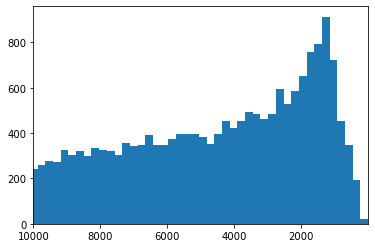

In [137]:
fig, ax = plt.subplots(1,1)
# fig.set_figheight(15)
# fig.set_figwidth(15)
# # ax.set_size_inches(10,15)
ax.set_xlim(10000)
ax.rev
ax.hist(df.palabras.values, bins=10000)

# data['pm2.5'].hist(bins=1000,grid=False)
# ax.set_xlabel("Palabras", fontsize=15)
# ax.set_ylabel("Documentos",fontsize=15)
plt.show()

In [139]:
np.argmax(df.palabras.values)

33328

In [145]:
print(df.iloc[np.argmax(df.palabras.values)].LINK)

https://www.corteconstitucional.gov.co/Relatoria/1996/C-037-96.htm


In [146]:
from bs4 import BeautifulSoup

In [148]:
main_soup = BeautifulSoup(df.iloc[np.argmax(df.palabras.values)].DOCUMENT, 'lxml')

In [149]:
main_soup.text

'LEY ESTATUTARIA JUSTICIA\n\n\n'

In [150]:
with open("sentencia_sucia.txt", "w") as f:
    f.write(df.iloc[np.argmax(df.palabras.values)].DOCUMENT)

In [35]:
X = ['mi mamá me mima', 'mi mamá me ama', 'amo a mi mamá']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vec = CountVectorizer(ngram_range=(1,3))
vec.fit(X)

CountVectorizer(ngram_range=(1, 3))

In [39]:
vec.vocabulary_

{'mi': 11,
 'mamá': 4,
 'me': 8,
 'mima': 14,
 'mi mamá': 12,
 'mamá me': 5,
 'me mima': 10,
 'mi mamá me': 13,
 'mamá me mima': 7,
 'ama': 0,
 'me ama': 9,
 'mamá me ama': 6,
 'amo': 1,
 'amo mi': 2,
 'amo mi mamá': 3}